In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv('4m_61f_all.csv')
data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS


In [13]:
x = data["NewLabel"].value_counts()
print(x)

Normal            2403724
DDOS               611405
BruteForce         475321
Infiltration       268064
DoS                183477
MalwareActivty      91561
Name: NewLabel, dtype: int64


In [14]:
newLabel = data.iloc[:, -1:]
#Label Encoding for NewLabel column
from sklearn import preprocessing
newLabel_le = newLabel.apply(preprocessing.LabelEncoder().fit_transform)
newLabel_le.head()
#Brute Force - 0
#DDOS - 1
#DoS - 2
#Infiltration - 3
#MalwareActivty - 4
#Normal - 5

,NewLabel
0,1
1,1
2,1
3,1
4,1


In [15]:
new_data = pd.concat([data.iloc[:, :-1],newLabel_le], axis=1)
new_data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
#Reduce data
data_minimal = new_data.sample(n = 100)
data_minimal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
42398,6,0.045,55921,80,7.0,5,598,316,5,1217,...,1,0,9,2,0,2,2,66,66,1
2933834,6,0.216,30762,3389,91.0,2,451,343,2,1316,...,0,0,4,4,0,0,0,0,0,5
3276762,6,3.836,23960,3389,88.0,13,2155,1441,9,2229,...,2,0,21,12,0,2,1,66,66,5
1693274,6,0.000,3389,12014,88.0,1,54,0,0,0,...,0,0,1,0,1,0,0,0,0,5
1801432,6,1.062,58561,3389,91.0,4,1321,1105,4,1741,...,0,0,8,7,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534494,6,0.697,58674,445,16.0,5,568,286,4,398,...,0,0,8,5,1,2,0,66,66,5
2898548,6,5.324,44401,3389,88.0,15,2282,1460,10,2283,...,2,0,24,12,0,2,1,66,66,5
2866079,6,4.047,59525,3389,88.0,14,2205,1437,9,2229,...,2,0,22,12,0,2,1,66,66,5
1518084,17,2223.149,15362,21,0.0,6,444,192,0,0,...,0,0,0,0,0,0,0,0,0,2


In [34]:
data_minimal.sort_values(by=['NewLabel'])

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
532592,17,0.143,19543,46969,0.0,6,766,514,5,630,...,0,0,0,0,0,0,0,0,0,0
615932,6,1.076,80,57385,7.0,6,975,627,7,1268,...,0,0,13,8,0,1,0,66,0,0
583043,17,0.081,46969,51900,0.0,3,254,128,4,248,...,0,0,0,0,0,0,0,0,0,0
694466,17,0.546,60958,46969,0.0,5,322,112,4,316,...,0,0,0,0,0,0,0,0,0,0
594839,17,1.712,25173,46969,0.0,5,1134,924,5,772,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007734,6,0.278,59296,445,16.0,3,439,277,2,280,...,0,0,5,4,0,0,0,0,0,5
3136889,6,1.954,51139,3389,88.0,8,1572,1128,7,1971,...,2,0,14,10,1,2,0,66,66,5
3386841,6,4.508,50411,3389,88.0,15,2294,1460,11,2356,...,2,0,25,13,0,2,2,66,66,5
1909720,6,3.309,36207,3389,88.0,11,1744,1138,7,1971,...,2,0,17,10,1,2,0,66,66,5


In [35]:
x = data_minimal.iloc[:,:-1]
y = data_minimal.iloc[:,-1:]

In [36]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
X_test

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
3312439,6,3.375,21145,3389,88.0,13,2174,1460,10,2283,...,0,2,0,22,12,0,2,1,66,66
2586285,6,2.327,60997,3389,88.0,10,1684,1132,7,1971,...,0,2,0,16,10,1,2,0,66,66
1736582,6,0.000,51863,5491,0.0,1,54,0,0,0,...,0,0,0,0,0,0,1,0,54,0
3412165,6,1.797,13850,3389,88.0,8,1566,1122,7,1971,...,0,2,0,14,10,1,2,0,66,66
3423231,6,2.418,11835,3389,88.0,8,1592,1148,7,1971,...,0,0,0,14,10,1,2,0,66,66
2796828,6,3.877,11906,3389,88.0,15,2282,1460,10,2283,...,0,2,0,24,12,0,2,1,66,66
1744501,17,63.038,546,547,103.0,7,1057,623,0,0,...,0,0,0,0,0,0,0,0,0,0
2461254,6,6.504,54498,3389,88.0,8,1588,1148,11,2183,...,0,0,0,18,10,1,2,0,62,62
259475,6,0.316,50706,80,7.0,4,592,364,1,66,...,0,0,0,4,2,0,2,0,66,66
2991099,6,0.365,35204,3389,88.0,4,418,190,3,1368,...,0,2,0,6,4,0,2,0,66,66


In [19]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01365
Feature: 1, Score: 0.03555
Feature: 2, Score: 0.00953
Feature: 3, Score: 0.10390
Feature: 4, Score: 0.08401
Feature: 5, Score: 0.01086
Feature: 6, Score: 0.12048
Feature: 7, Score: 0.03154
Feature: 8, Score: 0.05223
Feature: 9, Score: 0.00257
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01458
Feature: 12, Score: 0.00195
Feature: 13, Score: 0.01285
Feature: 14, Score: 0.01686
Feature: 15, Score: 0.03626
Feature: 16, Score: 0.01485
Feature: 17, Score: 0.00705
Feature: 18, Score: 0.04575
Feature: 19, Score: 0.01431
Feature: 20, Score: 0.00380
Feature: 21, Score: 0.02568
Feature: 22, Score: 0.02465
Feature: 23, Score: 0.00530
Feature: 24, Score: 0.01168

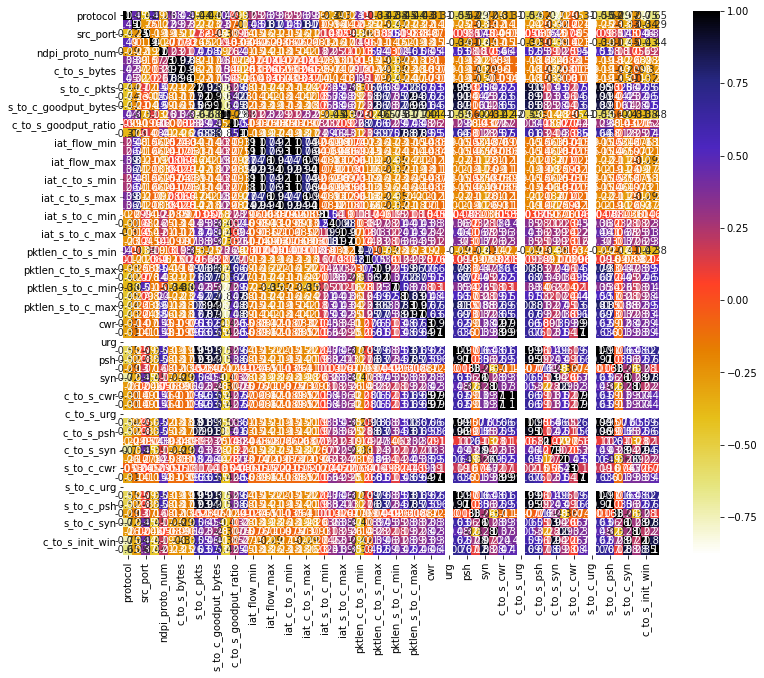

In [20]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [21]:
X_train.corr()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
protocol,1.000000,0.453381,-0.416082,0.490401,-0.291838,0.375850,0.420002,0.449263,-0.436107,-0.436583,...,-0.053230,-0.311743,NaN,-0.550581,-0.518335,-0.290770,-0.723265,-0.264633,-0.754095,-0.645520
duration,0.453381,1.000000,-0.251294,-0.099844,-0.222388,0.389974,0.366027,0.316607,-0.274128,-0.229750,...,-0.023712,-0.139750,NaN,-0.248241,-0.233985,-0.131266,-0.326938,-0.119009,-0.341007,-0.292201
src_port,-0.416082,-0.251294,1.000000,-0.188372,-0.191609,-0.150712,-0.212938,-0.272100,0.123585,0.000073,...,0.065300,-0.100230,NaN,0.089823,0.085289,0.166225,0.445135,0.004597,0.443836,0.367252
dst_port,0.490401,-0.099844,-0.188372,1.000000,-0.266075,-0.077112,-0.032710,0.025937,-0.152118,-0.199237,...,-0.022858,-0.145724,NaN,-0.339208,-0.309997,-0.159148,-0.453386,-0.174717,-0.433683,-0.444749
ndpi_proto_num,-0.291838,-0.222388,-0.191609,-0.266075,1.000000,0.230717,0.210742,0.167582,0.474255,0.578889,...,0.095385,0.479202,NaN,0.529947,0.578166,0.181831,0.170241,0.055946,0.189076,0.212204
c_to_s_pkts,0.375850,0.389974,-0.150712,-0.077112,0.230717,1.000000,0.974121,0.880450,-0.210291,-0.173766,...,-0.015213,-0.103013,NaN,-0.187461,-0.176012,-0.115498,-0.264689,-0.089488,-0.277033,-0.232390
c_to_s_bytes,0.420002,0.366027,-0.212938,-0.032710,0.210742,0.974121,1.000000,0.964793,-0.216766,-0.171509,...,-0.012941,-0.098933,NaN,-0.188924,-0.173579,-0.134941,-0.291454,-0.095775,-0.304973,-0.249363
c_to_s_goodput_bytes,0.449263,0.316607,-0.272100,0.025937,0.167582,0.880450,0.964793,1.000000,-0.221140,-0.167620,...,-0.011333,-0.092809,NaN,-0.189772,-0.170168,-0.147713,-0.311084,-0.102517,-0.324885,-0.260580
s_to_c_pkts,-0.436107,-0.274128,0.123585,-0.152118,0.474255,-0.210291,-0.216766,-0.221140,1.000000,0.916966,...,0.172777,0.534127,NaN,0.950417,0.926932,0.028141,0.563403,0.421369,0.552164,0.633190
s_to_c_bytes,-0.436583,-0.229750,0.000073,-0.199237,0.578889,-0.173766,-0.171509,-0.167620,0.916966,1.000000,...,0.142424,0.626744,NaN,0.914934,0.940921,-0.041605,0.453143,0.319166,0.464424,0.574841


In [22]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

36

In [24]:
corr_features

{'ack',
 'c_to_s_ack',
 'c_to_s_bytes',
 'c_to_s_cwr',
 'c_to_s_ece',
 'c_to_s_fin',
 'c_to_s_goodput_bytes',
 'c_to_s_init_win',
 'c_to_s_psh',
 'c_to_s_syn',
 'ece',
 'iat_c_to_s_avg',
 'iat_c_to_s_max',
 'iat_c_to_s_min',
 'iat_c_to_s_stddev',
 'iat_flow_avg',
 'iat_flow_max',
 'iat_flow_stddev',
 'iat_s_to_c_max',
 'iat_s_to_c_stddev',
 'pktlen_c_to_s_max',
 'pktlen_c_to_s_stddev',
 'pktlen_s_to_c_avg',
 'pktlen_s_to_c_max',
 'pktlen_s_to_c_stddev',
 'psh',
 's_to_c_ack',
 's_to_c_bytes',
 's_to_c_ece',
 's_to_c_fin',
 's_to_c_goodput_bytes',
 's_to_c_goodput_ratio',
 's_to_c_init_win',
 's_to_c_psh',
 's_to_c_rst',
 's_to_c_syn'}

In [25]:
X_train_drop = X_train.drop(corr_features, axis = 1)
X_test_drop = X_test.drop(corr_features, axis = 1)
X_train_drop

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,s_to_c_pkts,data_ratio,c_to_s_goodput_ratio,iat_flow_min,...,pktlen_s_to_c_min,cwr,urg,rst,syn,fin,c_to_s_urg,c_to_s_rst,s_to_c_cwr,s_to_c_urg
1908288,6,1.172,50656,3389,88.0,8,7,-0.107,72.2,1,...,54,0,0,1,2,0,0,1,0,0
3468704,6,4.201,11867,3389,88.0,15,9,0.012,64.0,2,...,54,1,0,0,2,1,0,0,0,0
2898548,6,5.324,44401,3389,88.0,15,10,-0.000,64.0,2,...,54,1,0,0,2,1,0,0,0,0
532592,17,0.143,19543,46969,0.0,6,5,0.097,67.0,1,...,62,0,0,0,0,0,0,0,0,0
3412165,6,1.797,13850,3389,88.0,8,7,-0.115,71.6,1,...,54,1,0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978059,6,3.850,50987,3389,88.0,9,7,-0.090,69.7,2,...,54,0,0,1,2,0,0,1,0,0
2796828,6,3.877,11906,3389,88.0,15,10,-0.000,64.0,2,...,54,1,0,0,2,1,0,0,0,0
10694,17,0.040,879,26857,0.0,64,0,1.000,91.3,1,...,0,0,0,0,0,0,0,0,0,0
255145,6,0.273,50760,80,7.0,6,5,-0.359,49.8,6,...,60,0,0,0,2,0,0,0,0,0


In [26]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train_drop, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[15:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.08990
Feature: 1, Score: 0.06246
Feature: 2, Score: 0.01989
Feature: 3, Score: 0.10748
Feature: 4, Score: 0.13708
Feature: 5, Score: 0.07779
Feature: 6, Score: 0.05981
Feature: 7, Score: 0.02567
Feature: 8, Score: 0.01334
Feature: 9, Score: 0.03691
Feature: 10, Score: 0.04995
Feature: 11, Score: 0.00515
Feature: 12, Score: 0.12018
Feature: 13, Score: 0.01832
Feature: 14, Score: 0.12913
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00203
Feature: 19, Score: 0.04491
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
